# Me

## Senior Data Scientist @ Sokrati

## Advertising Technology, Click Stream and Merchandising Data

## Masters Operations Research, IIT Mumbai

# Supervised Machine Learning

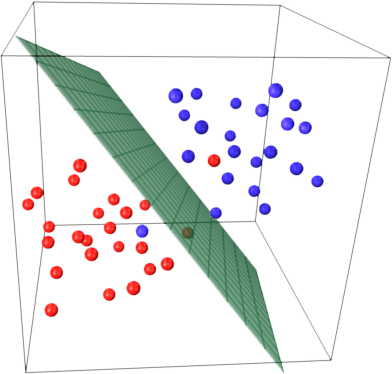

In [10]:
from IPython.display import display, Image
display(Image(filename='supervised_learning_basic.png'))

Image from Stack Overflow

# Supervised Learning Using Maths

## Hypothesis
  $$ \hat{y} = g (w_{0} + w_{1} * x_{1} + w_{2} * x_{2} + w_{3} * x_{3} + \dots ) + \epsilon $$

## Parameters
  $$ w_{0}, w_{1}, \dots, w_{m} $$

## Error
$$ \frac{1}{n} * \sum_{i \in n} (y_{i} - \hat{y_{i}} ) ^ 2 $$

## Data
  * Is given, constant
  
## Outputs / Predictions
  * Function of parameters
  
## Parameter Choice
  * Results in output (hence errors)
  
## Make lowest error!

# Parameter Fitting

## Choose best w, given the data

## How do you choose best?

## Intuition : Optimization Routines
* Trial and error
* Choose w, make prediction
* Change w, to improve the accuracy

## Decisions to be made
* How to calculate accuracy?
* How to form initial guess?
* How to update w based on accuracy?

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


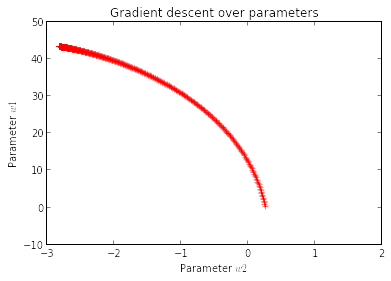

In [11]:
%pylab inline
import random
from sklearn.datasets.samples_generator import make_regression 
import matplotlib.pyplot as plt

all_theta_0 = []
all_theta_1 = []
all_cost = []

def gradient_descent(alpha, x, y, ep=0.001, max_iter=10000):
    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t0 = np.random.random(x.shape[1])
    all_theta_0.append(t0)
    t1 = np.random.random(x.shape[1])
    all_theta_1.append(t1)

    # total error, J(theta)
    J = sum([(t0 + t1*x[i] - y[i])**2 for i in range(m)])
    all_cost.append(J)

    # Iterate Loop
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
    
        # update theta
        t0 = temp0
        t1 = temp1
        all_theta_0.append(t0)
        all_theta_1.append(t1)

        # mean squared error
        e = sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) 

        if abs(J-e) <= ep:
            converged = True
    
        J = e   # update error 
        iter += 1  # update iter
    
        if iter == max_iter:
            converged = True

    return t0,t1

x, y = make_regression(n_samples=100, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 
 
alpha = 0.01 # learning rate
ep = 0.01 # convergence criteria

    # call gredient decent, and get intercept(=theta0) and slope(=theta1)
theta0, theta1 = gradient_descent(alpha, x, y, ep, max_iter=1000)
plt.plot(all_theta_0, all_theta_1, marker = "+", color = "red")
plt.figure(1, figsize=(16, 12))
plt.ylim(-10, 50)
plt.ylabel("Parameter $$w1$$")
plt.xlim(-3, 2)
plt.xlabel("Parameter $$w2$$")
plt.title("Gradient descent over parameters")
plt.show()

# Important Point

## X variables need not be numbers
### Else, machine learning has limited applications

## X variables should be convertible to numbers

## Thus, applicable to many fields
  * Images
  * Text
  * Biological Data
  * Videos

# Text: Focus of Today's talk

## Examples

### Sentiment Analysis
Same health example as before but with classes as positive negative sentiment.

### Named Entity Recognition

##### What are the X values?
  + What is the part of speech tag of N-1th word?
  + What is the part of speech tag of N-2th word?
  + What is the location of the phrase in the sentence?
  + Is it capitalized?
  + What is the part of speech tag of the phrase itself


# Bag of Words Model

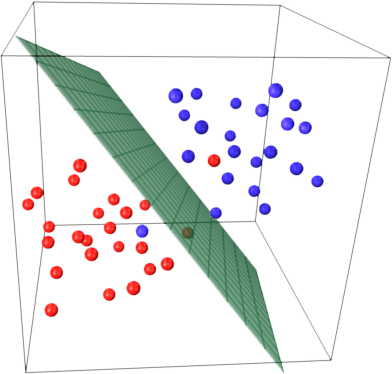

In [12]:
from IPython.display import display, Image
display(Image(filename='supervised_learning_basic.png'))

## Basic Idea
Words as axis

## Improvements
  * Frequency Vs. Binary Vs. Modified frequency (TFIDF)
  * Cleanups (stop words, numbers, stemming)

## Fundamental Issues
    * Just BoW may not be enough
    * Looses semantic similarity
    * Very sensitive to the settings

# Introduction To Neural Network

> -- <cite>All images from Quoc V. Le tutorial on deep learning'</cite>

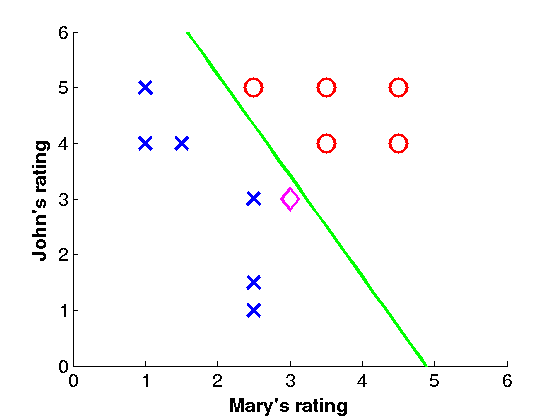

In [13]:
from IPython.display import display, Image
display(Image(filename='nn_intro1.png'))

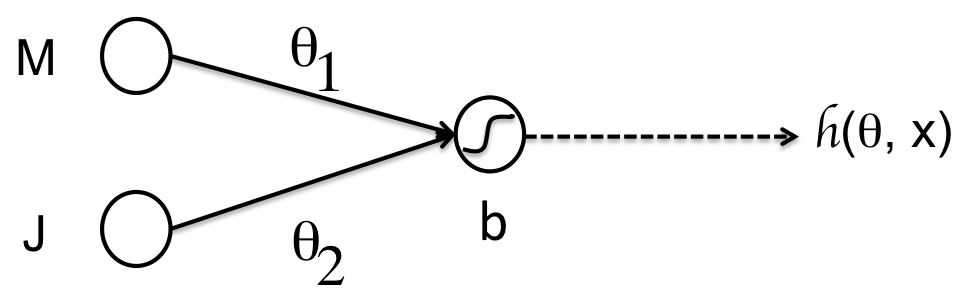

In [14]:
from IPython.display import display, Image
display(Image(filename='nn_intro2.png'))

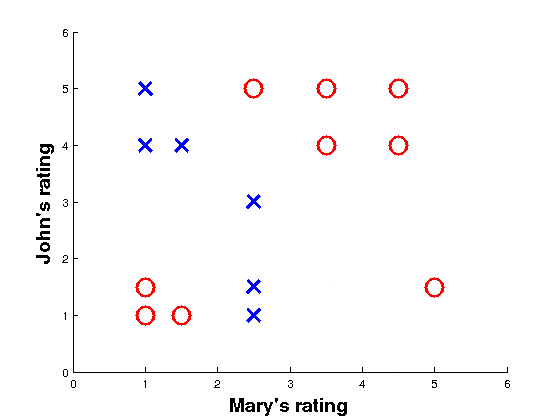

In [15]:
from IPython.display import display, Image
display(Image(filename='nn_intro3.png'))

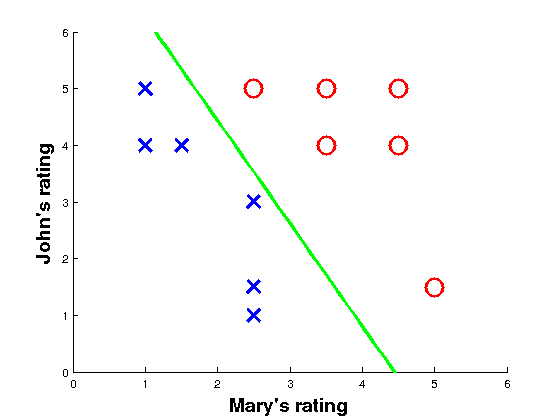

In [16]:
from IPython.display import display, Image
display(Image(filename='nn_intro4.png'))

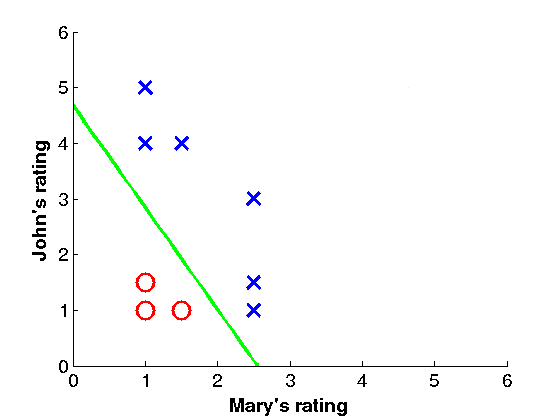

In [17]:
from IPython.display import display, Image
display(Image(filename='nn_intro5.png'))

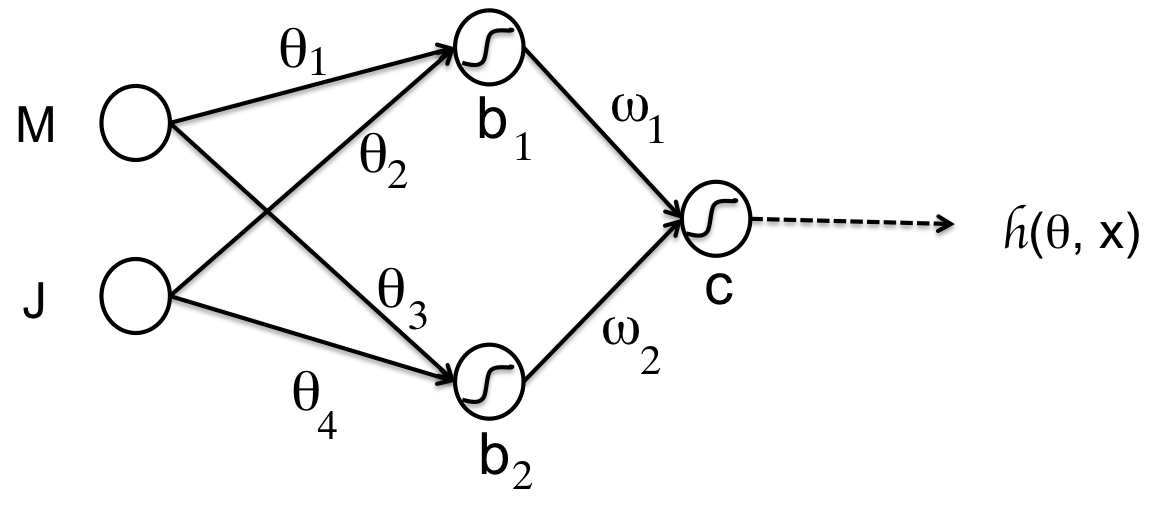

In [18]:
from IPython.display import display, Image
display(Image(filename='nn_intro6.png'))

# Neural Network Details

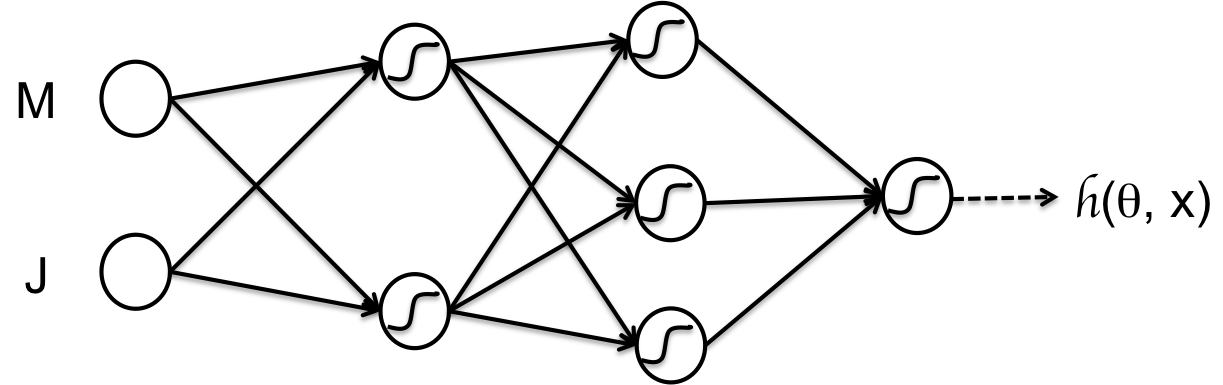

In [19]:
from IPython.display import display, Image
display(Image(filename='nn_intro7.png'))

## Non-Linearity
Different activation functions

## Training
  * Called backpropagation algorithm
  * Gradient descent + chain rule of derivatives

# Important Ideas

## Context Matters
  * Time Series
  * Images
  * Text
  * Videos

## Representation Problem
Derive a better representation using context

# Word2Vec Introduction

## Pioneers
  * Original ideas on distributed layered representations by Hinton et.al. from 1986
  * Neural probablistic language model
  * Paper on word2vec published by Tomas Mikolov et.al. in 2011-12
  * Very actively developed area currently.
  
## Basic Idea
  * Build unsupervised learning
  * Exploit contextual information
  * Convert words to vectors in continuous space
  * Use vectors in classification tasks
  
## Not a single algorithm
2 main models and multiple settings avaialable.

# Distributional Hypothesis

## Residents of city of *Pune* will have to...

## Residents of city of *Nagpur* will have to..

## Word is known by company it keeps

# Beware.. Maths Ahead!

* Assume we have vector rep for each word

$$ P(w_t | h) = softmax(score(w_t, h)) \\
              = \frac{\exp\{ \text{score}(w_t, h) \} }
             {\sum_{Word \, w' \, \in \, Vocab} \exp\{ {score}(w', h) \} } $$

* Score is computed by dot product of vector embeddings
* If multiple words in the context, average is taken
* Softmax function normalizes the scores to convert to probability

## Neural Network Task
  * Optimize the vector representation
  * To maximize the likelihood for all context, target word combinations

$$ J_{ML} = log \, P(w_t|h) \\ 
          = score(w_t,h)\, − \, log(\sum_{Word \, w' \, \in \, Vocab} \exp\{score(w′,h)\}) $$

## Problem
  + Probability normalization is happening over entire corpus
  + Will be very expensive to calculate
  
## Observation
  + Need not maximize the likelihood over all examples
  + Probability should be high for real pairs of context, target
  + Probability should be low for randomly selected context, target
  
## Solution
  + For every training example seen, use K negative examples
  + Negative examples generated through random selection
  
 $$ J_{NEG} = log Q_\theta(D=1 |w_t, h) +
  k \, \mathrm{E}_{\tilde w \sim P_{noise}}
     [ \log Q_\theta(D = 0 |\tilde w, h)] $$
     
> Q above is the binomial logistic regression probability 

# Example

# Details Skipped

## Two models
  + Continuous bag of words and skip gram
  + What are the differences?
  
## Why softmax in output layer

## Engineering Implementation
  + Optimized data structures for lookups
  + Can we speed up using multiple workers/thread?
  
## How parameters are tuned?

## How accuracy is evaluated

# Short Demo

# Further Developments

## More Algorithmic Explorations
  + Same problem modeled as matrix factorization problem
  + Evaluating different optimization criterion

## Handling Polysemy
  + If word can have different meanings, why single vector
  + I am exploring this problem

## Handling Document Representation
  + Tokens build up documents
  + Most interesting problems work with documents
  + Simple averaging is not enough
  + I am exploring this problem

# References

> -- <cite>Tomas Mikolov, Kai Chen, Greg Corrado, and Jeffrey Dean. Efficient estimation of word representations
in vector space. ICLR Workshop, 2013.</cite>

> -- <cite>Tutorial on deep learning by Quoc V. Le, 2015.</cite>

> -- <cite>Tutorial for Tensorflow package released open source by Google</cite>

> -- <cite>Blog post on word representations by Vered Shwartz  </cite>